# Preliminary plan for the prestressed bending tests

## Rectangular cross section 

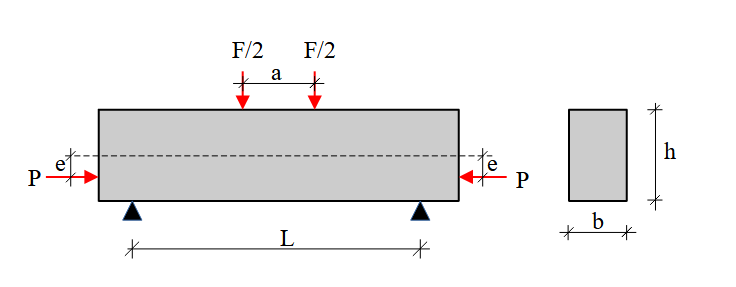

In [1]:
import numpy as np # numerical package
import matplotlib.pyplot as plt # plotting package

### Beam dimensions and eccentriciy 

In [2]:
#Beam dimensions
b = 100 #[mm] 
h = 250  #[mm] 
L = 1000 #[mm] 

# Compressive strength
fc = 30 #[N/mm2] 

# Eccentricity
e = 25 #[mm] 

# Distance between applied loading points (four point bending test)
a = 300 #[mm] 

# maximum eccentricity 
e_max = h/2 - (70+70+30)/2    # Determined from the dimensions of the used prestressing 100kN cylinder with dimameter of 70mm
e_max 

40.0

### Resulting stresses 

#### 1. Self weight (g) 

In [3]:
# Self weihgt 
q_g = b * h * 24e-6
M_g = q_g * L**2 / 8
q_g,M_g

sigma_g_top = - M_g / (b * h**2 /6)
sigma_g_bot =  M_g / (b * h**2 /6)

#sigma_g_top, sigma_g_bot

#### 2. Prestressing force (pr) 

In [4]:
# Prestressing force
P = 400e3 #[N]  # Using 4 cylinder each one 100kN

M_pr = P * e

sigma_pr_top = - (P / (b * h)) + M_pr / (b * h**2 /6)
sigma_pr_bot = - (P / (b * h)) - M_pr / (b * h**2 /6)

sigma_pr_top, sigma_pr_bot

(-6.4, -25.6)

#### 3. Vertical force (f) 

In [5]:
# Vertical force
F = 130e3 #[N] # The machine is limited to 160kN


M_f = (F/2) *(L-a)/2

sigma_f_top = - M_f / (b * h**2 /6)
sigma_f_bot = M_f / (b * h**2 /6)

sigma_f_top, sigma_f_bot

(-21.84, 21.84)

### Plotting stress profiles

In [6]:
sigma_g = np.array([ sigma_g_bot, 0, 0, sigma_g_top, sigma_g_bot])
sigma_pr = np.array([sigma_pr_bot,  0, 0, sigma_pr_top, sigma_pr_bot])
sigma_f = np.array([sigma_f_bot,  0, 0, sigma_f_top, sigma_f_bot])

y = np.array([0, 0, h, h, 0])
x_0 = np.array([0, 0, 0, 0, 0])

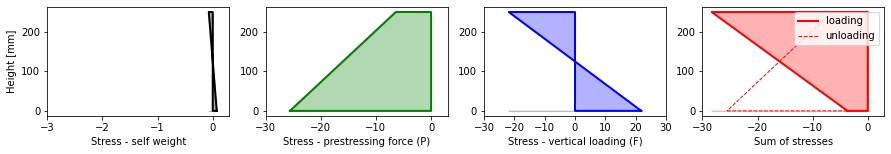

In [7]:
fig, (ax1, ax2, ax3, ax4)= plt.subplots(1,4,figsize=(15,2))

ax1.plot(sigma_g, y , color='black', lw=2)
ax1.fill_between(sigma_g, y,  x_0, color='black', alpha=0.3)
ax1.set_xlim(-fc/10, fc/100)
ax1.set_xlabel('Stress - self weight')
ax1.set_ylabel('Height [mm]')

ax2.plot(sigma_pr, y , color='green', lw=2)
ax2.fill_between(sigma_pr, y,  x_0, color='green', alpha=0.3)
ax2.set_xlim(-fc, fc/10)
ax2.set_xlabel('Stress - prestressing force (P)')


ax3.plot(sigma_f, y , color='blue', lw=2)
ax3.fill_between(sigma_f, y,  x_0, color='blue', alpha=0.3)
ax3.set_xlim(-fc, fc)
ax3.set_xlabel('Stress - vertical loading (F)')


ax4.plot(sigma_g + sigma_pr + sigma_f, y , color='red', lw=2, label='loading')
ax4.plot(sigma_g + sigma_pr, y , "--r", lw=1, label='unloading')
ax4.fill_between(sigma_g + sigma_pr + sigma_f, y,  x_0, color='red', alpha=0.3)
ax4.set_xlim(-fc, fc/10)
ax4.set_xlabel('Sum of stresses')
ax4.legend(loc=1)


### Normalized stress profiles ($\sigma$ / fc)

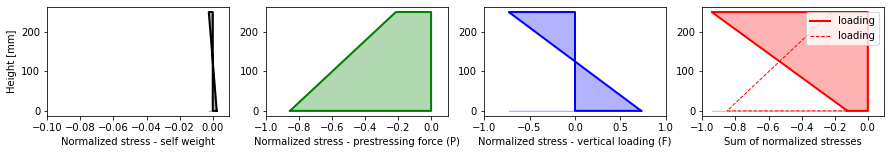

In [8]:
fig, (ax1, ax2, ax3, ax4)= plt.subplots(1,4,figsize=(15,2))

ax1.plot(sigma_g/fc, y , color='black', lw=2)
ax1.fill_between(sigma_g/fc, y,  x_0, color='black', alpha=0.3)
ax1.set_xlabel('Normalized stress - self weight')
ax1.set_xlim(-1/10, 1/100)
ax1.set_ylabel('Height [mm]')

ax2.plot(sigma_pr/fc, y , color='green', lw=2)
ax2.fill_between(sigma_pr/fc, y,  x_0, color='green', alpha=0.3)
ax2.set_xlim(-1, 1/10)
ax2.set_xlabel('Normalized stress - prestressing force (P)')

ax3.plot(sigma_f/fc, y , color='blue', lw=2)
ax3.fill_between(sigma_f/fc, y,  x_0, color='blue', alpha=0.3)
ax3.set_xlim(-1, 1)
ax3.set_xlabel('Normalized stress - vertical loading (F)')

ax4.plot((sigma_g + sigma_pr + sigma_f)/fc, y , color='red', lw=2, label='loading')
ax4.plot((sigma_g + sigma_pr)/fc , y, "--r", lw=1, label='loading')
ax4.fill_between((sigma_g + sigma_pr + sigma_f)/fc, y,  x_0, color='red', alpha=0.3)
#ax4.fill_between((sigma_g + sigma_pr)/fc, y,  x_0, color='red', alpha=0.1)
ax4.set_xlim(-1, 1/10)
ax4.set_xlabel('Sum of normalized stresses')
ax4.legend(loc=1)

In [9]:
print("Stress ratios at top")
print("Loading stage: Smax =", np.around(-(sigma_g + sigma_pr + sigma_f)[3]/fc,2))
print("Loading stage: Smin =",  np.around(-(sigma_g + sigma_pr)[3]/fc, 2))
print("Loading stage: Amplitude =", np.around(-(sigma_g + sigma_pr + sigma_f)[3]/fc + (sigma_g + sigma_pr)[3]/fc, 2))
print("*****************")

print("Stress ratios at bottom")
print("Unloading stage: Smax =", np.around(-(sigma_g + sigma_pr)[0]/fc,2))
print("Unloading stage: Smin =", np.around(-(sigma_g + sigma_pr + sigma_f)[0]/fc, 2))
print("Loading stage: Amplitude =", np.around(+(sigma_g + sigma_pr + sigma_f)[0]/fc - (sigma_g + sigma_pr)[0]/fc, 2))

Stress ratios at top
Loading stage: Smax = 0.94
Loading stage: Smin = 0.22
Loading stage: Amplitude = 0.73
*****************
Stress ratios at bottom
Unloading stage: Smax = 0.85
Unloading stage: Smin = 0.12
Loading stage: Amplitude = 0.73


### Summary of some requirements
1. After applying the prestressing force:
 - stress at the top < 0 (no tension)
 - stress at the bottom < fc 
 ----
2. The sum of stresses:
 - no tension at bottom
 - stress at the top < fc
 - The differnce of the streess at top during loading and unloading should be large enough to get fatigue failure